<a href="https://colab.research.google.com/github/Dimidrol9/Dimidrol9/blob/main/CNN_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для зміни Runtime Type потрібно клікнути *Runtime -> Change runtime type -> обрати CPU або GPU в полі Hardware accelerator -> Save*

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, losses
import matplotlib.pyplot as plt
tf.test.is_gpu_available()

False

Before transforms:  (60000, 28, 28) (10000, 28, 28)
After:  (60000, 28, 28, 1) (10000, 28, 28, 1)


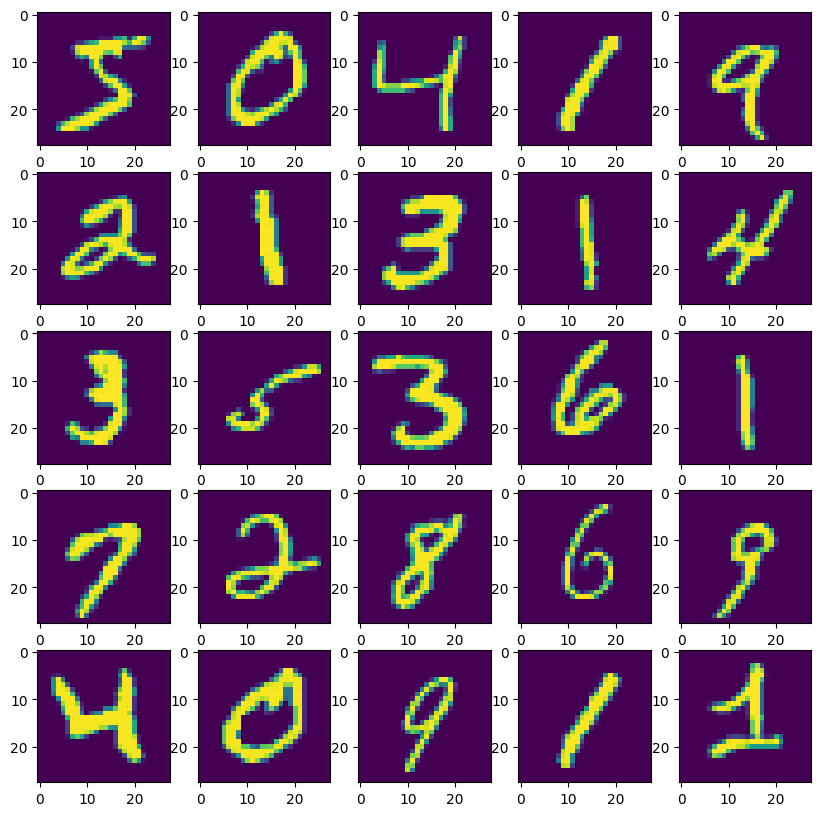

In [9]:
# Load MNIST dataset
(train, train_labels), (test, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to range between 0 and 1
train, test = train.astype("float32") / 255.0, test.astype("float32") / 255.0

print("Before transforms: ", train.shape, test.shape)

train = np.expand_dims(train, -1) # to shape = (batch, h, w, c)
test = np.expand_dims(test, -1)

print("After: ", train.shape, test.shape)

train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)


# Show images
plt.figure(figsize=(10, 10)) # grid size

for i in range(25):
    plt.subplot(5, 5, i+1)    # n. of images in the grid is 25
    plt.imshow(train[i, :, :, 0])

plt.show()

In [10]:
#@title Hyperparams
batch_size = 256 #@param {type:"integer"}
kernel_size = 5 #@param {type:"integer"}
n_epochs=5 #@param {type:"integer"}
optimizer="adam" #@param {type: "string"}

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(28, 28, 1)))
model.add(layers.Conv2D(16, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10)) # because there are 10 digits, thus 10 output classes

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,994 (117.16 KB)

 Trainable params: 29,994 (117.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.8039 - loss: 0.6529 - val_accuracy: 0.9723 - val_loss: 0.0923
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 82ms/step - accuracy: 0.9725 - loss: 0.0920 - val_accuracy: 0.9817 - val_loss: 0.0579
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.9808 - loss: 0.0655 - val_accuracy: 0.9814 - val_loss: 0.0560
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.9856 - loss: 0.0470 - val_accuracy: 0.9887 - val_loss: 0.0382
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9890 - loss: 0.0363 - val_accuracy: 0.9887 - val_loss: 0.0377
313/313 - 2s - 8ms/step - accuracy: 0.9887 - loss: 0.0377
Test loss:  0.03774084523320198
Test accuracy:  0.9886999726295471


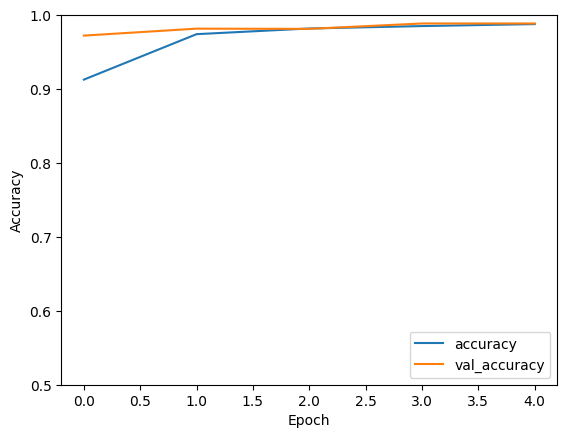

In [11]:
# Compilation
model.compile(optimizer, loss=losses.CategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
# Training
report = model.fit(train, train_labels, epochs=n_epochs, batch_size=batch_size, validation_data=(test, test_labels))

plt.plot(report.history['accuracy'], label='accuracy')
plt.plot(report.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test, test_labels, verbose=2)

print("Test loss: ", test_loss)
print("Test accuracy: ", test_acc)